In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlossanmartinr","key":"ed2a954956fa015f2c86454734d0bac9"}'}

In [4]:
import os

# Crear la carpeta donde Kaggle espera encontrar el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Descargar el dataset de la competencia california-house-prices
!kaggle competitions download -c california-house-prices

In [6]:
import zipfile

with zipfile.ZipFile("california-house-prices.zip", "r") as zip_ref:
    zip_ref.extractall("california-house-prices")


In [7]:
df_train = pd.read_csv("california-house-prices/train.csv")
df_test = pd.read_csv("california-house-prices/test.csv")

In [8]:
df_train.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  int64  
 1   Address                      47439 non-null  object 
 2   Sold Price                   47439 non-null  float64
 3   Summary                      47085 non-null  object 
 4   Type                         47439 non-null  object 
 5   Year built                   46394 non-null  float64
 6   Heating                      40587 non-null  object 
 7   Cooling                      26745 non-null  object 
 8   Parking                      46065 non-null  object 
 9   Lot                          33258 non-null  float64
 10  Bedrooms                     44567 non-null  object 
 11  Bathrooms                    43974 non-null  float64
 12  Full bathrooms               39574 non-null  float64
 13  Total interior l

In [10]:
df_train.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.000000,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,30734.000000,30735.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,2.967300e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,5.317206,1.691593,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,8.078537e+05,93279.178587
std,13694.604047,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,2.002768,2.462879,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,1.177903e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,3.350000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,5.980000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,9.500000e+05,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


In [11]:
df_train.describe(include=["O"]).T

,count,unique,top,freq
Address,47439,47325,55 W 20th Ave,4
Summary,47085,46787,"Neighboring The Ace Hotel, 939 S. Broadway is ...",18
Type,47439,158,SingleFamily,31324
Heating,40587,1859,Central,9593
Cooling,26745,540,Central Air,8875
Parking,46065,5112,"Garage, Garage - Attached, Covered",10392
Bedrooms,44567,264,3,14943
Region,47437,949,Los Angeles,10338
Elementary School,42697,1717,Laurel Elementary School,339
Middle School,30735,488,Hubert Howe Bancroft Middle School,949


In [12]:
df_train.nunique()

,0
Id,47439
Address,47325
Sold Price,5627
Summary,46787
Type,158
Year built,164
Heating,1859
Cooling,540
Parking,5112
Lot,8205


In [13]:
df_train.columns

Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School', 'Middle School Score', 'Middle School Distance',
       'High School', 'High School Score', 'High School Distance', 'Flooring',
       'Heating features', 'Cooling features', 'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State'],
      dtype='object')

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas
corr_matrix = df_train.corr(numeric_only=True)

# Correlaciones con la variable objetivo (SoldPrice)
correlaciones = corr_matrix["Sold Price"].drop("Sold Price")  # Quitamos la diagonal

# Ordenar de mayor a menor
correlaciones_ordenadas = correlaciones.sort_values(ascending=False)

# Mostrar como tabla
print(correlaciones_ordenadas)


Annual tax amount              0.746221
Tax assessed value             0.743233
Last Sold Price                0.706779
Listed Price                   0.612651
Full bathrooms                 0.544245
Bathrooms                      0.516208
Elementary School Score        0.275555
Middle School Score            0.244285
High School Score              0.191616
Garage spaces                  0.009288
Total spaces                   0.007492
Total interior livable area   -0.001520
Lot                           -0.006610
Year built                    -0.027095
Zip                           -0.049961
Id                            -0.051396
Middle School Distance        -0.059330
Elementary School Distance    -0.086177
High School Distance          -0.099491
Name: Sold Price, dtype: float64


In [15]:
df_train.groupby("Bedrooms").size().sort_values(ascending=False)

,0
Bedrooms,
3,14943
2,9772
4,7073
1,2313
5,2016
...,...
"Master Suite / Retreate - 2+, More than One Master Bedroom on Ground Floor",1
"More than One Bedroom on Ground Floor, Walk-in Closet, Master Suite / Retreate - 2+, More than One Master Bedroom on Ground Floor",1
"Ground Floor Bedroom, Inverted Floor Plan, Master Bedroom on Ground Floor, Walk-in Closet",1


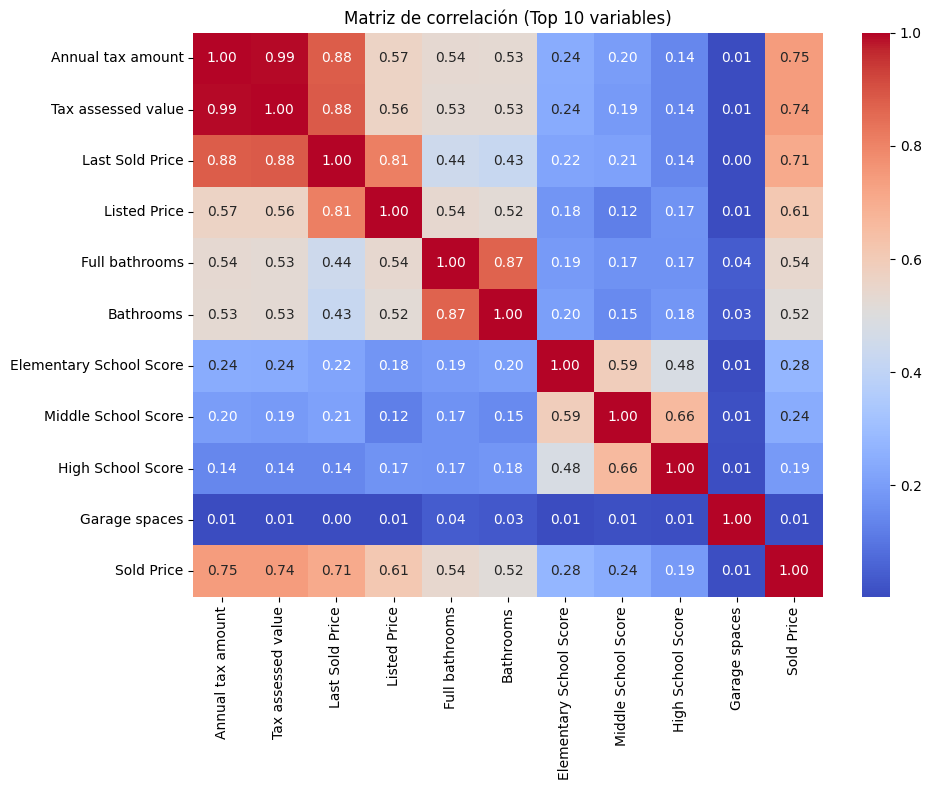

In [16]:
# Tomar las variables más correlacionadas con SalePrice (por ejemplo, top 10)
top_features = correlaciones_ordenadas.head(10).index.tolist() + ["Sold Price"]

plt.figure(figsize=(10, 8))
sns.heatmap(df_train[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (Top 10 variables)")
plt.tight_layout()
plt.show()


In [17]:
corr_matrix = df_train.corr(numeric_only=True).abs()
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
             .stack()
             .sort_values(ascending=False))

# Mostrar pares con correlación mayor a 0.8
print(high_corr[high_corr > 0.8])

Total spaces        Garage spaces        0.995649
Tax assessed value  Annual tax amount    0.992381
                    Last Sold Price      0.884078
Annual tax amount   Last Sold Price      0.879468
Bathrooms           Full bathrooms       0.869580
Listed Price        Last Sold Price      0.810344
dtype: float64


In [18]:
df_train.isnull().sum().sort_values(ascending=False)

,0
Cooling features,22223
Cooling,20694
Last Sold On,17766
Last Sold Price,17766
Middle School Score,16705
Middle School,16704
Middle School Distance,16704
Laundry features,14611
Lot,14181
Appliances included,13593


In [19]:
# Selección de columnas
columnas_seleccionadas = [
    "Listed Price",
    "Full bathrooms",
    "Garage spaces",
    "Year built",
    "Elementary School Score",
    "Total interior livable area",
    "Zip",
    "Sold Price"
]

# Crear nuevo DataFrame
df_modelo = df_train[columnas_seleccionadas].copy()
df_modelo.head()

,Listed Price,Full bathrooms,Garage spaces,Year built,Elementary School Score,Total interior livable area,Zip,Sold Price
0,4198000.0,NaN,0.0,1969.0,7.0,1.0,94022,3825000.0
1,525000.0,2.0,1.0,1926.0,3.0,872.0,90047,505000.0
2,180000.0,1.0,0.0,1958.0,NaN,1152.0,95375,140000.0
3,1895000.0,3.0,0.0,1947.0,9.0,2612.0,90230,1775000.0
4,1595000.0,NaN,NaN,NaN,6.0,NaN,93432,1175000.0


In [20]:
df_modelo.isnull().sum().sort_values(ascending=False)

,0
Full bathrooms,7865
Elementary School Score,4896
Total interior livable area,2526
Year built,1045
Garage spaces,917
Listed Price,0
Zip,0
Sold Price,0


In [21]:
df_modelo.isnull().mean().sort_values(ascending=False)*100

,0
Full bathrooms,16.579186
Elementary School Score,10.320622
Total interior livable area,5.324733
Year built,2.202829
Garage spaces,1.933009
Listed Price,0.000000
Zip,0.000000
Sold Price,0.000000


In [22]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Listed Price                 47439 non-null  float64
 1   Full bathrooms               39574 non-null  float64
 2   Garage spaces                46522 non-null  float64
 3   Year built                   46394 non-null  float64
 4   Elementary School Score      42543 non-null  float64
 5   Total interior livable area  44913 non-null  float64
 6   Zip                          47439 non-null  int64  
 7   Sold Price                   47439 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.9 MB


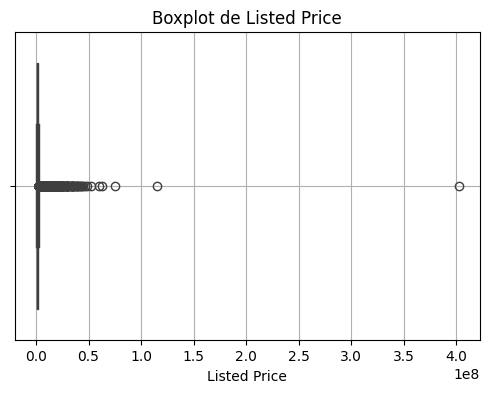

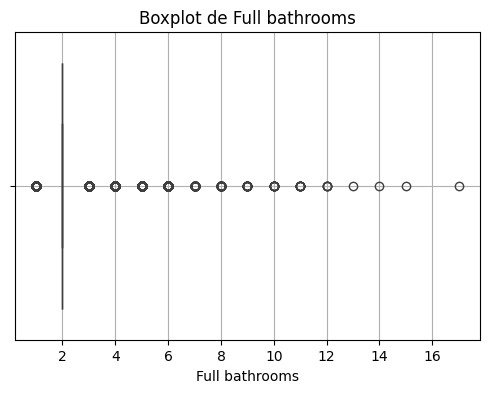

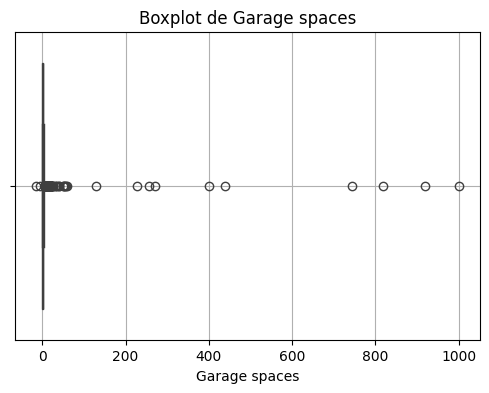

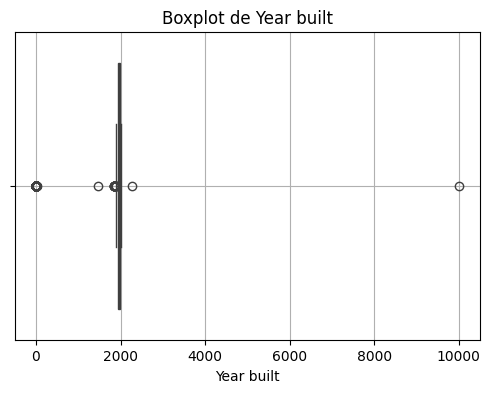

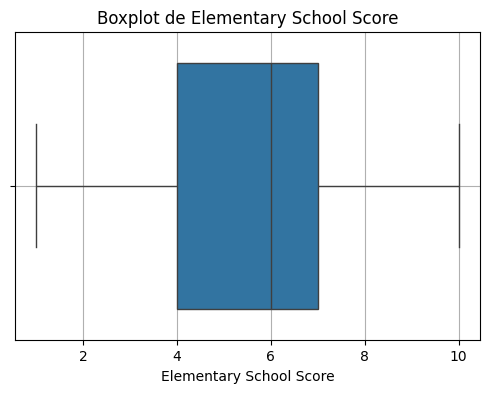

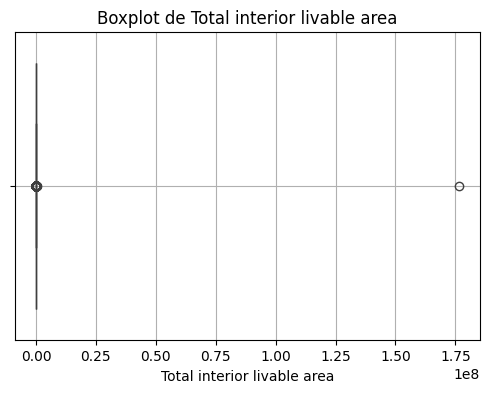

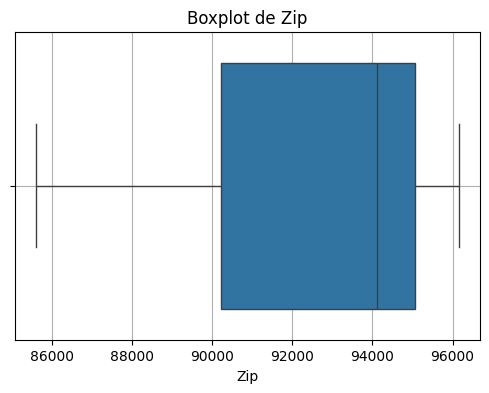

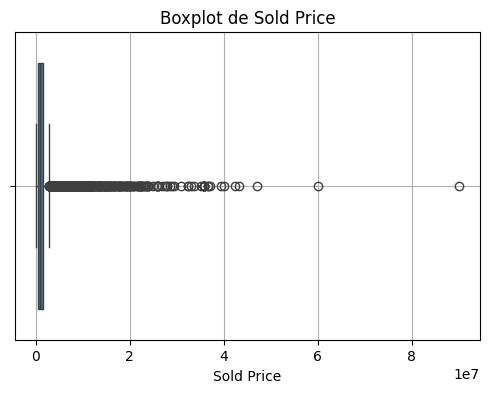

In [23]:
#REVISANDO OUTLIERS
# Lista de variables numéricas
numericas =  [
    "Listed Price",
    "Full bathrooms",
    "Garage spaces",
    "Year built",
    "Elementary School Score",
    "Total interior livable area",
    "Zip",
    "Sold Price"]

# Crear un boxplot por variable
for var in numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_modelo[var])
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
    plt.grid(True)
    plt.show()

In [24]:
# Imputar usando la mediana por columna
df_modelo_imputado = df_modelo.copy()
df_modelo_imputado = df_modelo_imputado.fillna(df_modelo.median(numeric_only=True))

In [25]:
#transformar year built en edad
# Corregir años construidos mayores a 2025
df_modelo_imputado["Year built"] = df_modelo_imputado["Year built"].clip(upper=2025)

# Ahora calcular la edad
df_modelo_imputado["House age"] = 2025 - df_modelo_imputado["Year built"]
df_modelo_imputado.drop("Year built", axis=1, inplace=True)



In [26]:
df_modelo_imputado.isnull().sum().sort_values(ascending=False)

,0
Listed Price,0
Full bathrooms,0
Garage spaces,0
Elementary School Score,0
Total interior livable area,0
Zip,0
Sold Price,0
House age,0


In [27]:
mediana_valida = df_modelo_imputado[df_modelo_imputado["Listed Price"] > 0]["Listed Price"].median()
df_modelo_imputado.loc[df_modelo_imputado["Listed Price"] == 0, "Listed Price"] = mediana_valida

In [28]:
# Log para suavizar precios y superficie
for col in ["Listed Price", "Sold Price", "Total interior livable area"]:
    df_modelo_imputado[col] = np.log1p(df_modelo_imputado[col])

# Recortar valores extremos
df_modelo_imputado["Full bathrooms"] = df_modelo_imputado["Full bathrooms"].clip(upper=5)
df_modelo_imputado["Garage spaces"] = df_modelo_imputado["Garage spaces"].clip(upper=6)

In [29]:
#para que no hayan valores negativos en cantidad de estacionamientos
df_modelo_imputado["Garage spaces"] = df_modelo_imputado["Garage spaces"].clip(lower=0, upper=6)

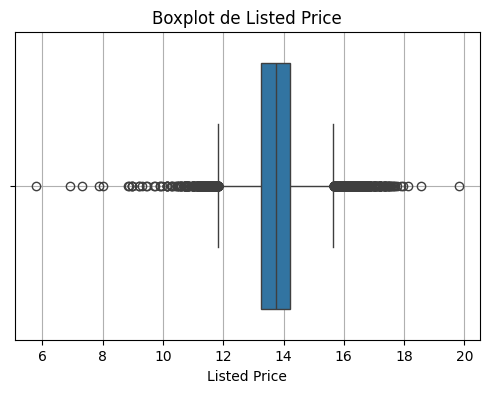

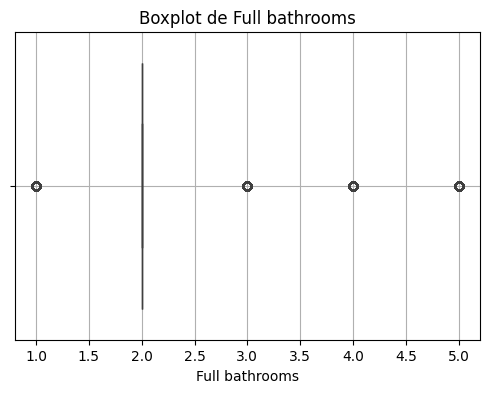

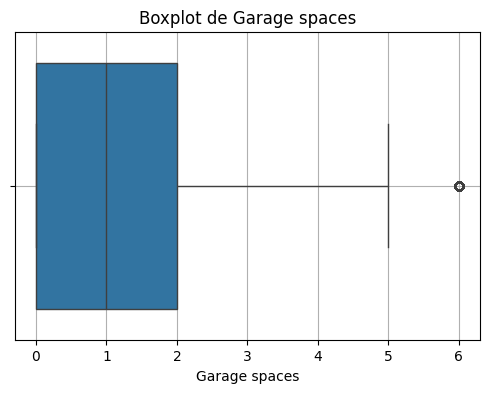

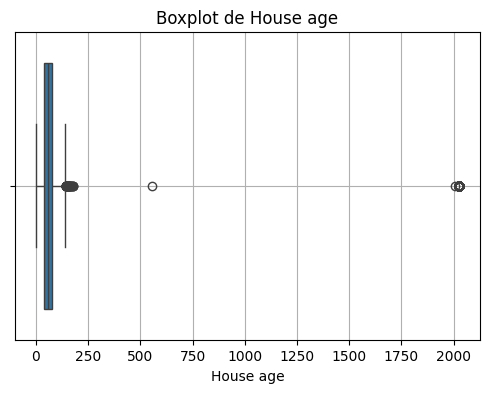

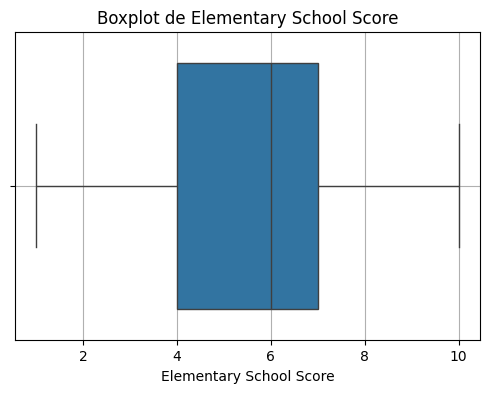

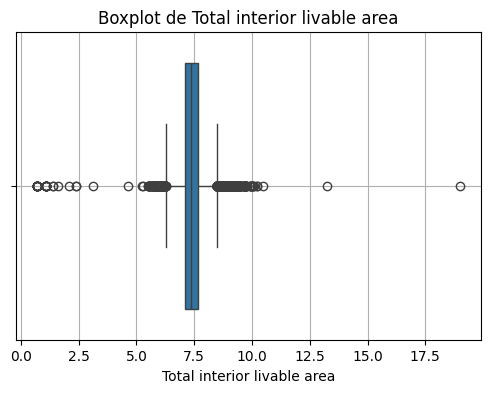

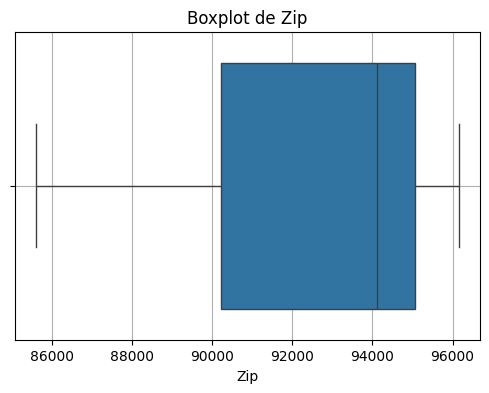

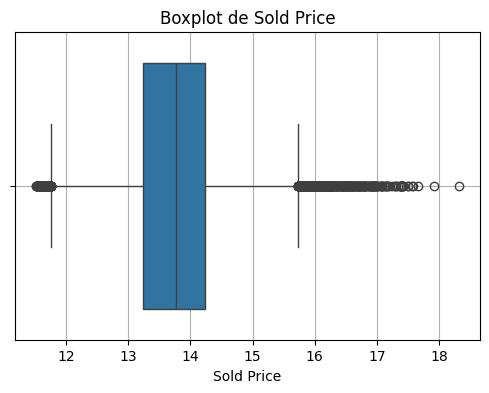

In [30]:
#REVISANDO OUTLIERS
# Lista de variables numéricas
numericas =  [
    "Listed Price",
    "Full bathrooms",
    "Garage spaces",
    "House age",
    "Elementary School Score",
    "Total interior livable area",
    "Zip",
    "Sold Price"]

# Crear un boxplot por variable
for var in numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_modelo_imputado[var])
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
    plt.grid(True)
    plt.show()

In [31]:
#no aparecen listed price con valor 0 ya que los impute primero con el log, luego como se distorsiono le aplique que se rellenaran con la mediana todos los valores 0, por eso en esta celda no aparece nada
df_modelo_imputado[df_modelo_imputado["Listed Price"] < 1]


,Listed Price,Full bathrooms,Garage spaces,Elementary School Score,Total interior livable area,Zip,Sold Price,House age


In [32]:
#dado que el preprocesamiento esta listo, en este punto comienzo a crear los modelos.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Separar X (features) e y (target)
X = df_modelo_imputado.drop("Sold Price", axis=1)
y = df_modelo_imputado["Sold Price"]

# División train/test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predecir sobre el set de prueba
y_pred = modelo_lr.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo de Regresión Lineal: {rmse:.4f}")


RMSE del modelo de Regresión Lineal: 0.2454


In [33]:
# Cuando usas np.log1p() en tus precios (Sold Price), estás cambiando la forma de ver los números. En lugar de trabajar con los precios reales, estás trabajando con sus logaritmos.
# Se usa el log porque los precios pueden variar muchísimo, y el log comprime los valores grandes y hace que el modelo aprenda mejor.
# Es por esto que en esta celda se devuelve a la escala original
aprox_error_relativo = np.expm1(rmse)
print(f"Error relativo aproximado: {aprox_error_relativo:.2%}")


Error relativo aproximado: 27.82%


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Entrenar
rf_model.fit(X_train, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test)

# RMSE en escala log
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE del modelo Random Forest (log): {rmse_rf:.4f}")

RMSE del modelo Random Forest (log): 0.2202


In [35]:
import numpy as np

# Interpretación relativa del RMSE logarítmico
error_relativo_rf = np.expm1(rmse_rf)
print(f"Error relativo aproximado del modelo Random Forest: {error_relativo_rf:.2%}")


Error relativo aproximado del modelo Random Forest: 24.63%


In [36]:
!pip install xgboost --quiet

from xgboost import XGBRegressor

# Crear el modelo
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Entrenar
xgb_model.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test)

# RMSE en escala log
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE del modelo XGBoost (log): {rmse_xgb:.4f}")


RMSE del modelo XGBoost (log): 0.2108


In [37]:
import numpy as np

# Interpretación relativa del RMSE logarítmico
error_relativo_xgb = np.expm1(rmse_xgb)
print(f"Error relativo aproximado del modelo XGBoost: {error_relativo_xgb:.2%}")


Error relativo aproximado del modelo XGBoost: 23.47%


In [38]:
!pip install lightgbm --quiet
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
error_relativo_lgbm = np.expm1(rmse_lgbm)

print(f"RMSE LGBM (log): {rmse_lgbm:.4f}")
print(f"Error relativo LGBM: {error_relativo_lgbm:.2%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 37951, number of used features: 7
[LightGBM] [Info] Start training from score 13.739280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [40]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir el modelo base
lgbm = LGBMRegressor(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 6, 8],
    'num_leaves': [31, 50],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,  # Validación cruzada con 3 particiones
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Entrenar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_lgbm = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred_best = best_lgbm.predict(X_test)

# Calcular RMSE logarítmico
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
error_relativo_best = np.expm1(rmse_best)

# Mostrar resultados
print(f"Mejor combinación de hiperparámetros: {grid_search.best_params_}")
print(f"RMSE (log): {rmse_best:.4f}")
print(f"Error relativo aproximado: {error_relativo_best:.2%}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 37951, number of used features: 7
[LightGBM] [Info] Start training from score 13.739280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
error_relativo_gb = np.expm1(rmse_gb)

print(f"RMSE Gradient Boosting (log): {rmse_gb:.4f}")
print(f"Error relativo Gradient Boosting: {error_relativo_gb:.2%}")


RMSE Gradient Boosting (log): 0.2100
Error relativo Gradient Boosting: 23.36%


**Conclusiones:**
* LightGBM fue el mejor modelo, con el menor error relativo aproximado (23.05%),
superando a XGBoost y Random Forest en precisión y eficiencia.

* Los modelos basados en boosting (XGBoost, LightGBM, Gradient Boosting) fueron consistentemente más precisos que la regresión lineal y el Random Forest.

* El preprocesamiento (limpieza de nulos, logaritmo, manejo de outliers) tuvo un impacto clave en la calidad de los modelos.

* La transformación log1p() fue especialmente útil para estabilizar los modelos y reducir el sesgo causado por valores extremos de precio.